<a href="https://colab.research.google.com/github/paulandrea0/Qualifica-DAF/blob/main/DAF_31marzo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Importando Datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal
import math

df_test_1 = pd.read_csv('/gdrive/MyDrive/Sismos/VT_Z_teste.csv')
df_train_1 = pd.read_csv('/gdrive/MyDrive/Sismos/VT_Z_train.csv') 
df_test_2 = pd.read_csv('/gdrive/MyDrive/Sismos/LP_Z_teste.csv')
df_train_2 = pd.read_csv('/gdrive/MyDrive/Sismos/LP_Z_train.csv')
df_test_3 = pd.read_csv('/gdrive/MyDrive/Sismos/TOR_Z_teste.csv')
df_train_3 = pd.read_csv('/gdrive/MyDrive/Sismos/TOR_Z_train.csv')

Concatenando df de entrenamiento y prueba

In [3]:
df_VT = pd.concat([df_test_1, df_train_1], axis=0)
df_LP = pd.concat([df_test_2, df_train_2], axis=0)
df_TOR = pd.concat([df_test_3, df_train_3], axis=0)
print(df_VT.shape, df_LP.shape, df_TOR.shape)

(1736, 13348) (402, 3000) (67, 27408)


Concatenando VT_Galeras con VT_Etna

# **Procesando data**

Transformando todo a array Numpy y quitando los valores NaN de los array

In [4]:
x_VT = df_VT.values
x_LP = df_LP.values
x_TOR = df_TOR.values

x_VT[np.isnan(x_VT)] = 0.0
x_LP[np.isnan(x_LP)] = 0.0
x_TOR[np.isnan(x_TOR)] = 0.0

Uniformizando duración de los sismos a 3 segundos

In [5]:
x_VT = x_VT[:, 0:3000]
x_LP = x_LP[:, 0:3000]
x_TOR = x_TOR[:, 0:3000]
print(x_VT.shape, x_LP.shape, x_TOR.shape)

(1736, 3000) (402, 3000) (67, 3000)


Filtrando señales

In [6]:
from scipy.signal import butter, filtfilt

# Frecuencia de corte
fc = 2
fs = 100
t = np.linspace(0, 3, 3000)
# Orden del filtro
order = 5

# Coeficientes del filtro Butterworth
b, a = butter(order, fc / (fs/2), btype='highpass')

# Filtrando la señal VT
VT_filt = filtfilt(b, a, x_VT)
VT_freq = np.fft.fft(VT_filt)

# Filtrando la señal LP
LP_filt = filtfilt(b, a, x_LP)
LP_freq = np.fft.fft(LP_filt)

# Filtrando la señal TOR
TOR_filt = filtfilt(b, a, x_TOR)
TOR_freq = np.fft.fft(TOR_filt)

Graficando las señales filtradas

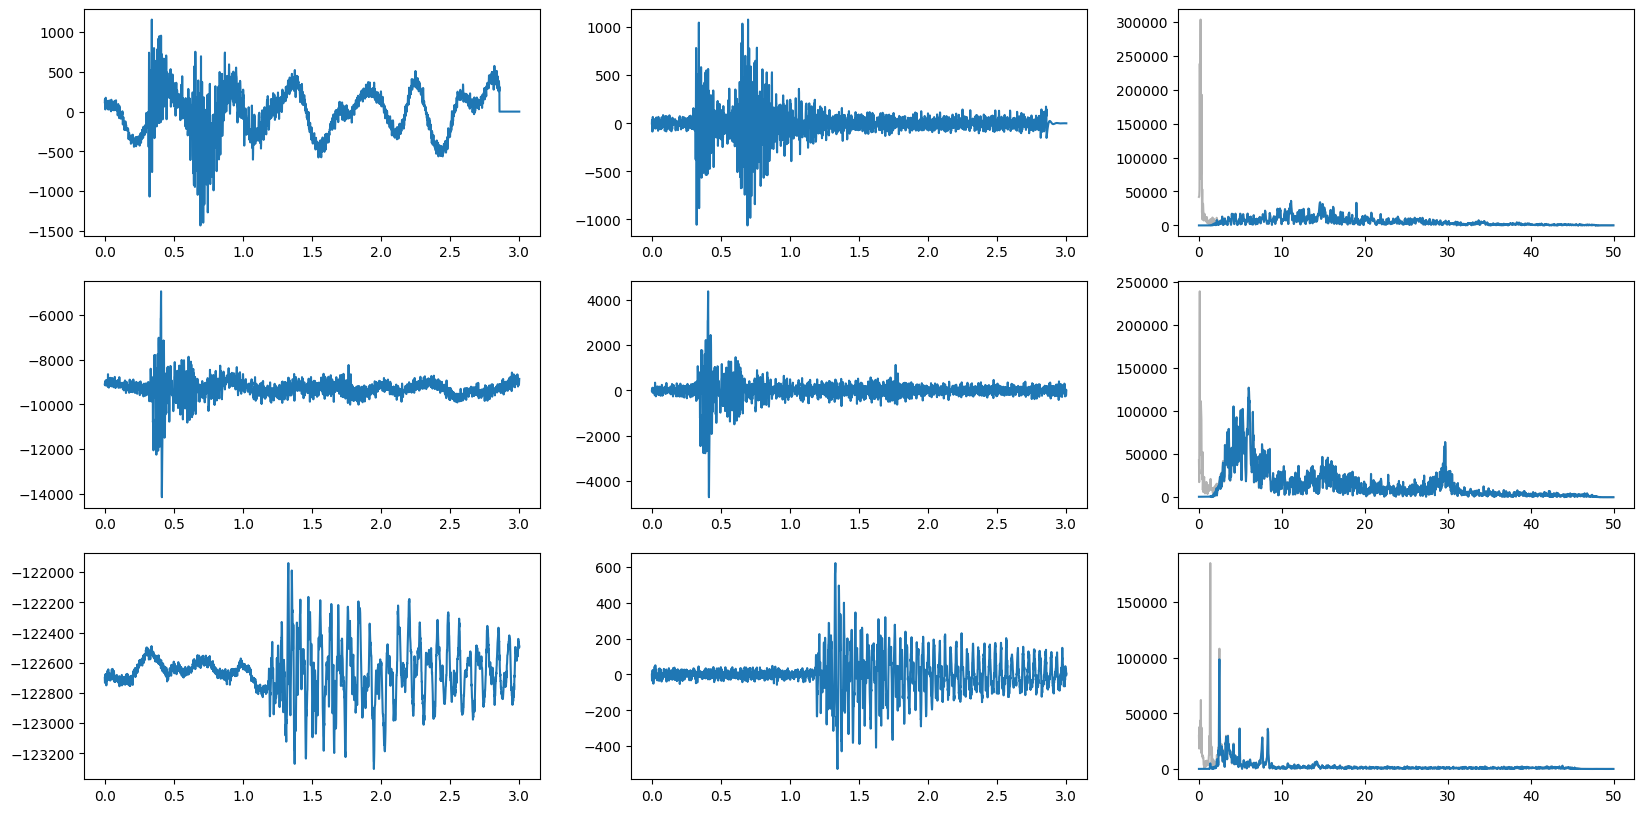

In [7]:
freq = np.fft.fftfreq((3000), 1/fs)  
pos_mask = np.where(freq > 0)
freq_pos = freq[pos_mask]

plt.figure(figsize=(20,10))

plt.subplot(331)
plt.plot(t, x_VT[10])
plt.subplot(332)
plt.plot(t, VT_filt[10])
plt.subplot(333)
Y = np.fft.fft(x_VT[10])
Y = Y[pos_mask]
plt.plot(freq_pos,np.abs(Y), "k", alpha=0.3)
X = VT_freq[10][pos_mask]
plt.plot(freq_pos,np.abs(X))


plt.subplot(334)
plt.plot(t, x_LP[10])
plt.subplot(335)
plt.plot(t, LP_filt[10])
plt.subplot(336)
Y = np.fft.fft(x_LP[10])
Y = Y[pos_mask]
plt.plot(freq_pos,np.abs(Y), "k", alpha=0.3)
X = LP_freq[10][pos_mask]
plt.plot(freq_pos,np.abs(X))

plt.subplot(3,3,7)
plt.plot(t, x_TOR[10])
plt.subplot(3,3,8)
plt.plot(t, TOR_filt[10])
plt.subplot(3,3,9)
Y = np.fft.fft(x_TOR[10])
Y = Y[pos_mask]
plt.plot(freq_pos,np.abs(Y), "k", alpha=0.3)
X = TOR_freq[10][pos_mask]
plt.plot(freq_pos,np.abs(X))

Normalizando señales

Mínimo y máximo originales: -2911064.6, 2848062.7
Mínimo y máximo normalizado: 0.0, 1.0
Mínimo y máximo originales: -151163.5, 153625.9
Mínimo y máximo normalizado: 0.0, 1.0
Mínimo y máximo originales: -36571.8, 37284.1
Mínimo y máximo normalizado: 0.0, 1.0


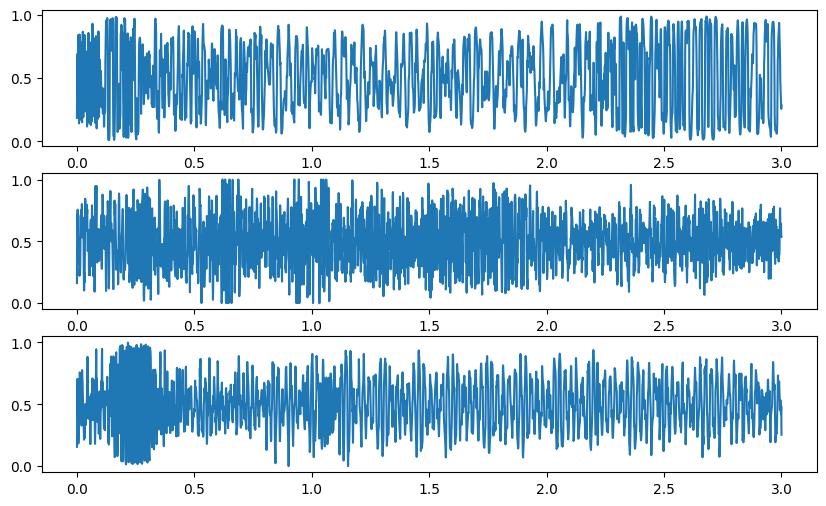

In [8]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

# Señales VT
x_VT = min_max_scaler.fit_transform(VT_filt)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(VT_filt), np.max(VT_filt)))      
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}'.format(np.min(x_VT), np.max(x_VT))) 


# Señales LP
x_LP = min_max_scaler.fit_transform(LP_filt)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(LP_filt), np.max(LP_filt)))      
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}'.format(np.min(x_LP), np.max(x_LP))) 

# Señales Tor
x_TOR = min_max_scaler.fit_transform(TOR_filt)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(TOR_filt), np.max(TOR_filt)))      
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}'.format(np.min(x_TOR), np.max(x_TOR)))   

# Graficando
plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.plot(t, x_VT[60])
plt.subplot(312)
plt.plot(t, x_LP[18])
plt.subplot(313) 
plt.plot(t, x_TOR[38])

Función para retirar *offset*

In [9]:
def mean_norma(sinal):
        return sinal.apply(lambda x: (x-x.mean()), axis=1)  

Retirando offset

In [10]:
df_VT = mean_norma(pd.DataFrame(x_VT))  # Señales VT
df_LP = mean_norma(pd.DataFrame(x_LP))  # Señales LP
df_TOR = mean_norma(pd.DataFrame(x_TOR))  # Señales Tor

x_VT = df_VT.values
x_LP = df_LP.values
x_TOR = df_TOR.values

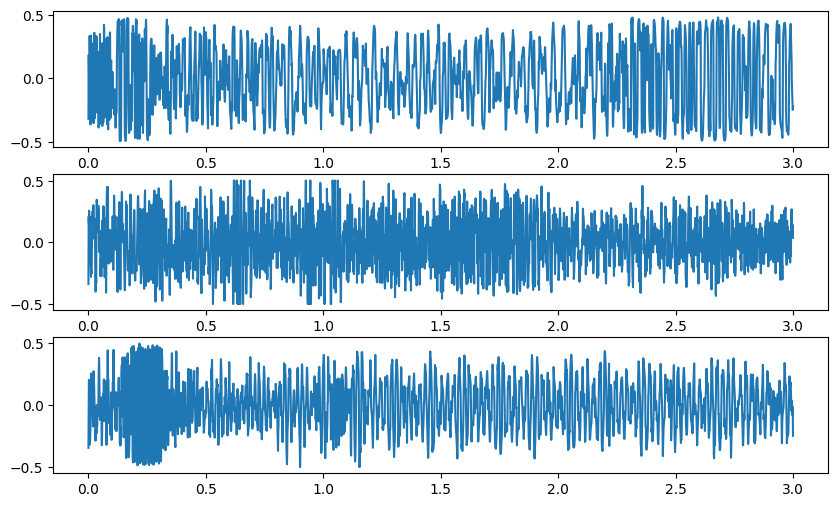

In [11]:
# Graficando
plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.plot(t, x_VT[60])
plt.subplot(312)
plt.plot(t, x_LP[18])
plt.subplot(313) 
plt.plot(t, x_TOR[38])

Concatenamos todos los datos para ser pre-procesados en el DAF

In [12]:
data = np.concatenate((x_VT, x_LP, x_TOR), axis=0)

# Creando vector de etiquetas
y = np.concatenate([np.zeros(1736), np.ones(402), np.full(67, 2)])
y = np.expand_dims(y, axis=1)     # necesario para poder concatenar las etiquetas con data por diferencia de dimensiones

# Concatenando las etiquetas al dataset 
data = np.concatenate((y,data), axis=1)


print(y, y.shape)
print(data.shape)

X_train = data[np.r_[0:1389, 1736:2058, 2138:2192]]
X_test = data[np.r_[1389:1736, 2058:2138, 2192:2205]]

[[0.]
 [0.]
 [0.]
 ...
 [2.]
 [2.]
 [2.]] (2205, 1)
(2205, 3001)


In [13]:
print(X_test.shape, X_train.shape)

train_counts = np.unique(X_train[:,0], return_counts=True)
test_counts = np.unique(X_test[:,0], return_counts=True)

print("Distribución de las clases en X_train:", train_counts)
print("Distribución de las clases en X_test:", test_counts)

(440, 3001) (1765, 3001)
Distribución de las clases en X_train: (array([0., 1., 2.]), array([1389,  322,   54]))
Distribución de las clases en X_test: (array([0., 1., 2.]), array([347,  80,  13]))


Vector de etiquetas con la distribución de las clases teneindo en cuenta que estas se divivieron en X_train y X_test

In [14]:
y = np.concatenate(((X_train[:,0]),(X_test[:,0])), axis=0)
print(y.shape)
X_train = X_train[:, 1:3001]
X_test = X_test[:, 1:3001]
print(X_train.shape, X_test.shape)

(2205,)
(1765, 3000) (440, 3000)


# **D A F**

In [15]:
%tensorflow_version 2.x
import tensorflow as tf
print('version de TensorFlow:' + tf.__version__)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras import Sequential
from keras.regularizers import l2 # cuando hay sobreajuste la regularización ayuda
# a decartar valores altos en la función de costo. Se puede colocar en cualquier capa
from keras.layers import Dropout  #apagar aleatoriamente algunas neuronas, 
# ayudando a eliminar el sobreajuste
from keras.callbacks import EarlyStopping

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
version de TensorFlow:2.12.0


**Autoencoder I *sigmoide***

In [16]:
np.random.seed(23)

dim_entrada = X_train.shape[1]      
entrada_sig = Input(shape=(dim_entrada,))
print(X_train.shape[1])             

# Encoder
x = Dense(2000, activation='relu', kernel_regularizer=l2(0.0001))(entrada_sig)
x = Dropout(0.25)(x)
x = Dense(1000, activation='relu')(x)
x = Dropout(0.25)(x)
encoded_sig = Dense(800, activation='relu', name='bottleneck_layer')(x)

# Decoder 
x = Dense(1000, activation='relu')(encoded_sig)
x = Dropout(0.25)(x)
x = Dense(2000, activation='relu', kernel_regularizer=l2(0.0001))(x)
x = Dropout(0.25)(x)
decoded_sig = Dense(3000, activation='sigmoid')(x)

# autoencoder = entrada + decoder (que contiene el encoder)
autoencoder1_sig = Model(inputs=entrada_sig, outputs=decoded_sig)

autoencoder1_sig.summary()

3000
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3000)]            0         
                                                                 
 dense (Dense)               (None, 2000)              6002000   
                                                                 
 dropout (Dropout)           (None, 2000)              0         
                                                                 
 dense_1 (Dense)             (None, 1000)              2001000   
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 bottleneck_layer (Dense)    (None, 800)               800800    
                                                                 
 dense_2 (Dense)             (None, 1000)              8

**Autoencoder I *tanh***

In [17]:
np.random.seed(23)

dim_entrada = X_train.shape[1]      
entrada_tan = Input(shape=(dim_entrada,))
print(X_train.shape[1])             

# Encoder
x = Dense(2000, activation='relu', kernel_regularizer=l2(0.0001))(entrada_tan)
x = Dropout(0.25)(x)
x = Dense(1000, activation='relu', kernel_regularizer=l2(0.0001))(x)
x = Dropout(0.15)(x)
encoded_tan = Dense(800, activation='relu', name='bottleneck_layer')(x)

# Decoder 
x = Dense(1000, activation='relu', kernel_regularizer=l2(0.0001))(encoded_tan)
x = Dropout(0.15)(x)
x = Dense(2000, activation='relu', kernel_regularizer=l2(0.0001))(x)
x = Dropout(0.25)(x)
decoded_tan = Dense(3000, activation='tanh')(x)

# autoencoder = entrada + decoder (que contiene el encoder)
autoencoder1_tan = Model(inputs=entrada_tan, outputs=decoded_tan)

autoencoder1_tan.summary()

3000
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3000)]            0         
                                                                 
 dense_5 (Dense)             (None, 2000)              6002000   
                                                                 
 dropout_4 (Dropout)         (None, 2000)              0         
                                                                 
 dense_6 (Dense)             (None, 1000)              2001000   
                                                                 
 dropout_5 (Dropout)         (None, 1000)              0         
                                                                 
 bottleneck_layer (Dense)    (None, 800)               800800    
                                                                 
 dense_7 (Dense)             (None, 1000)             

Aplicando Autoencoders I

In [18]:
autoencoder1_tan = Model(inputs=entrada_tan, outputs=decoded_tan)
autoencoder1_tan.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = autoencoder1_tan.fit(X_train, X_train,    
                           epochs=15,
                           batch_size=128,
                           validation_data=(X_test, X_test),    
                           shuffle=True)

Epoch 1/15
14/14 [==============================] - 12s 45ms/step - loss: 0.6311 - accuracy: 0.0079 - val_loss: 0.3934 - val_accuracy: 0.0000e+00
Epoch 2/15
14/14 [==============================] - 0s 21ms/step - loss: 0.3244 - accuracy: 0.0119 - val_loss: 0.2159 - val_accuracy: 0.0023
Epoch 3/15
14/14 [==============================] - 0s 21ms/step - loss: 0.1978 - accuracy: 0.0946 - val_loss: 0.1653 - val_accuracy: 0.1136
Epoch 4/15
14/14 [==============================] - 0s 16ms/step - loss: 0.1431 - accuracy: 0.1224 - val_loss: 0.1188 - val_accuracy: 0.1136
Epoch 5/15
14/14 [==============================] - 0s 13ms/step - loss: 0.1167 - accuracy: 0.1314 - val_loss: 0.1156 - val_accuracy: 0.8795
Epoch 6/15
14/14 [==============================] - 0s 14ms/step - loss: 0.0991 - accuracy: 0.1377 - val_loss: 0.0847 - val_accuracy: 0.0023
Epoch 7/15
14/14 [==============================] - 0s 13ms/step - loss: 0.0866 - accuracy: 0.1615 - val_loss: 0.0839 - val_accuracy: 0.7682
Epoch 8/

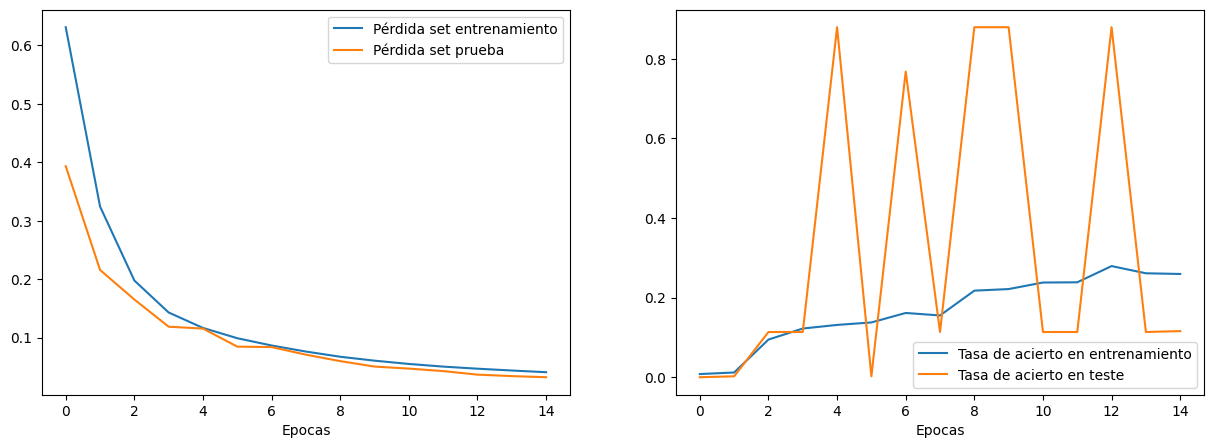

In [19]:
import matplotlib.pyplot as plt
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Tasa de acierto en entrenamiento")
plt.plot(historia.history["val_accuracy"], label="Tasa de acierto en teste")
plt.xlabel('Epocas')
plt.legend()

In [20]:
autoencoder1_sig = Model(inputs=entrada_sig, outputs=decoded_sig)
autoencoder1_sig.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = autoencoder1_sig.fit(X_train, X_train,    
                           epochs=15,
                           batch_size=128,
                           validation_data=(X_test, X_test),    
                           shuffle=True)

Epoch 1/15
14/14 [==============================] - 3s 31ms/step - loss: 0.5528 - accuracy: 0.0074 - val_loss: 0.4106 - val_accuracy: 0.0000e+00
Epoch 2/15
14/14 [==============================] - 0s 18ms/step - loss: 0.3534 - accuracy: 0.0000e+00 - val_loss: 0.2984 - val_accuracy: 0.0000e+00
Epoch 3/15
14/14 [==============================] - 0s 13ms/step - loss: 0.2748 - accuracy: 0.0000e+00 - val_loss: 0.2524 - val_accuracy: 0.0000e+00
Epoch 4/15
14/14 [==============================] - 0s 13ms/step - loss: 0.2444 - accuracy: 0.0000e+00 - val_loss: 0.2352 - val_accuracy: 0.0000e+00
Epoch 5/15
14/14 [==============================] - 0s 12ms/step - loss: 0.2325 - accuracy: 0.0000e+00 - val_loss: 0.2278 - val_accuracy: 0.0000e+00
Epoch 6/15
14/14 [==============================] - 0s 13ms/step - loss: 0.2270 - accuracy: 0.0000e+00 - val_loss: 0.2241 - val_accuracy: 0.0000e+00
Epoch 7/15
14/14 [==============================] - 0s 13ms/step - loss: 0.2242 - accuracy: 0.0000e+00 - val_l

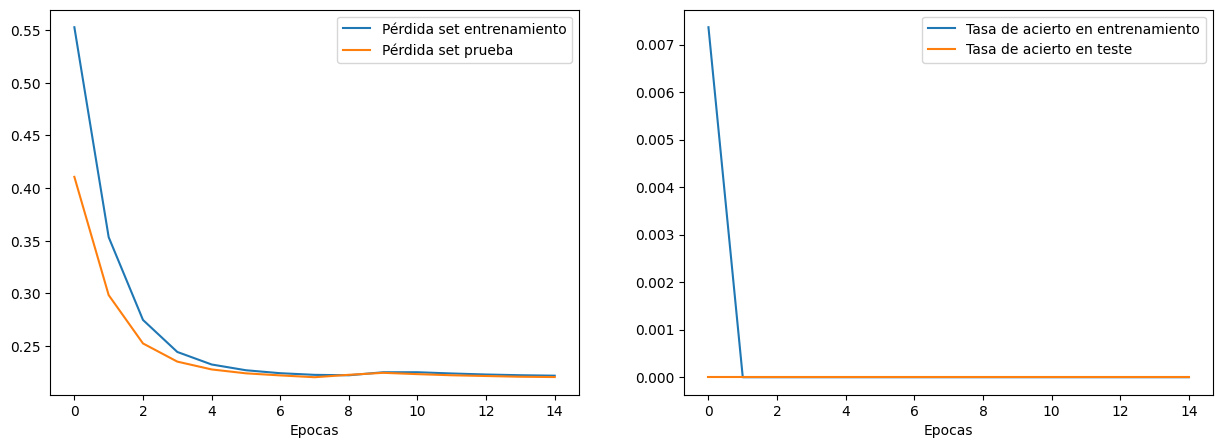

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Tasa de acierto en entrenamiento")
plt.plot(historia.history["val_accuracy"], label="Tasa de acierto en teste")
plt.xlabel('Epocas')
plt.legend()

In [22]:
bottleneck = Model(entrada_sig, encoded_sig)
rep_test_1sig = bottleneck.predict(X_test)
rep_train_1sig = bottleneck.predict(X_train)
print(rep_test_1sig.shape)
print(rep_train_1sig.shape)

56/56 [==============================] - 0s 2ms/step
(440, 800)
(1765, 800)


In [23]:
bottleneck = Model(entrada_tan, encoded_tan)
rep_test_1tan = bottleneck.predict(X_test)
rep_train_1tan = bottleneck.predict(X_train)
print(rep_test_1tan.shape)
print(rep_train_1tan.shape)

56/56 [==============================] - 0s 2ms/step
(440, 800)
(1765, 800)


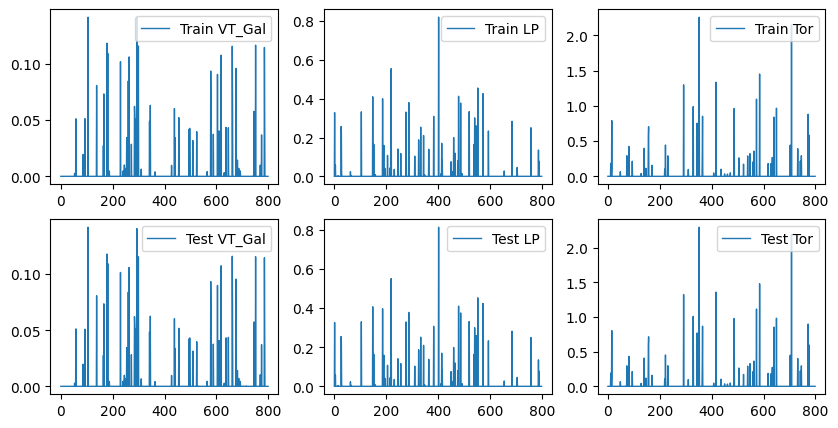

In [25]:
plt.figure(figsize=(10,5))
plt.subplot(2,3,1)
plt.plot(rep_train_1tan[1000], linewidth=1)
plt.legend(labels=["Train VT_Gal"])
plt.subplot(2,3,2)
plt.plot(rep_train_1tan[1550], linewidth=1)
plt.legend(labels=["Train LP"])
plt.subplot(2,3,3)
plt.plot(rep_train_1tan[1750], linewidth=1)
plt.legend(labels=["Train Tor"], loc='upper right')

plt.subplot(2,3,4)
plt.plot(rep_test_1tan[300], linewidth=1)
plt.legend(labels=["Test VT_Gal"])
plt.subplot(2,3,5)
plt.plot(rep_test_1tan[390], linewidth=1)
plt.legend(labels=["Test LP"])
plt.subplot(2,3,6)
plt.plot(rep_test_1tan[435], linewidth=1)
plt.legend(labels=["Test Tor"])

**Autoencoder II *sigmoid***

In [26]:
np.random.seed(23)

dim_entrada = rep_train_1sig.shape[1]      
entrada_s = Input(shape=(dim_entrada,))
print(rep_train_1sig.shape[1])             

# Encoder
x = Dense(400, activation='relu', kernel_regularizer=l2(0.001))(entrada_s)
x = Dropout(0.05)(x)
encoded_s = Dense(200, activation='relu', name='bottleneck_layer')(x)

# Decoder 
x = Dense(400, activation='relu', kernel_regularizer=l2(0.001))(encoded_s)
x = Dropout(0.05)(x)
decoded_s = Dense(800, activation='sigmoid')(x)

# autoencod1.2 = Model(inputs=entrada, outputs=decoded)
autoencoder1_2sig= Model(inputs=entrada_s, outputs=decoded_s)

autoencoder1_2sig.summary()

800
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 800)]             0         
                                                                 
 dense_10 (Dense)            (None, 400)               320400    
                                                                 
 dropout_8 (Dropout)         (None, 400)               0         
                                                                 
 bottleneck_layer (Dense)    (None, 200)               80200     
                                                                 
 dense_11 (Dense)            (None, 400)               80400     
                                                                 
 dropout_9 (Dropout)         (None, 400)               0         
                                                                 
 dense_12 (Dense)            (None, 800)               

**Autoencoder II *tanh***

In [27]:
np.random.seed(23)

dim_entrada = rep_train_1tan.shape[1]      
entrada_t = Input(shape=(dim_entrada,))
print(rep_train_1tan.shape[1])             

# Encoder
x = Dense(600, activation='relu', kernel_regularizer=l2(0.0001))(entrada_t)
x = Dropout(0.05)(x)
x = Dense(400, activation='relu', kernel_regularizer=l2(0.0001))(entrada_t)
#x = Dropout(0.05)(x)
encoded_t = Dense(200, activation='relu', name='bottleneck_layer')(x)

# Decoder 
x = Dense(400, activation='relu', kernel_regularizer=l2(0.0001))(encoded_t)
#x = Dropout(0.05)(x)
x = Dense(600, activation='relu', kernel_regularizer=l2(0.0001))(encoded_t)
x = Dropout(0.05)(x)
decoded_t = Dense(800, activation='tanh')(x)

# autoencod1.2 = Model(inputs=entrada, outputs=decoded)
autoencoder1_2tan = Model(inputs=entrada_t, outputs=decoded_t)

autoencoder1_2tan.summary()

800
Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 800)]             0         
                                                                 
 dense_14 (Dense)            (None, 400)               320400    
                                                                 
 bottleneck_layer (Dense)    (None, 200)               80200     
                                                                 
 dense_16 (Dense)            (None, 600)               120600    
                                                                 
 dropout_11 (Dropout)        (None, 600)               0         
                                                                 
 dense_17 (Dense)            (None, 800)               480800    
                                                                 
Total params: 1,002,000
Trainable params: 1,002,000
Non

Aplicando Autoencoders II

In [28]:
autoencoder1_2sig = Model(inputs=entrada_s, outputs=decoded_s)
autoencoder1_2sig.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = autoencoder1_2sig.fit(rep_train_1sig, rep_train_1sig,    
                           epochs=20,
                           batch_size=128,
                           validation_data=(rep_test_1sig, rep_test_1sig),    
                           shuffle=True)

Epoch 1/20
14/14 [==============================] - 2s 19ms/step - loss: 3.3181 - accuracy: 0.0000e+00 - val_loss: 3.0950 - val_accuracy: 0.0000e+00
Epoch 2/20
14/14 [==============================] - 0s 7ms/step - loss: 2.9784 - accuracy: 0.0000e+00 - val_loss: 2.8755 - val_accuracy: 0.0000e+00
Epoch 3/20
14/14 [==============================] - 0s 7ms/step - loss: 2.8009 - accuracy: 0.0017 - val_loss: 2.7403 - val_accuracy: 0.0000e+00
Epoch 4/20
14/14 [==============================] - 0s 7ms/step - loss: 2.6895 - accuracy: 0.0742 - val_loss: 2.6533 - val_accuracy: 0.0000e+00
Epoch 5/20
14/14 [==============================] - 0s 8ms/step - loss: 2.6171 - accuracy: 0.0550 - val_loss: 2.5949 - val_accuracy: 0.0341
Epoch 6/20
14/14 [==============================] - 0s 8ms/step - loss: 2.5729 - accuracy: 0.0924 - val_loss: 2.5638 - val_accuracy: 0.1818
Epoch 7/20
14/14 [==============================] - 0s 8ms/step - loss: 2.5480 - accuracy: 0.1042 - val_loss: 2.5464 - val_accuracy: 0.

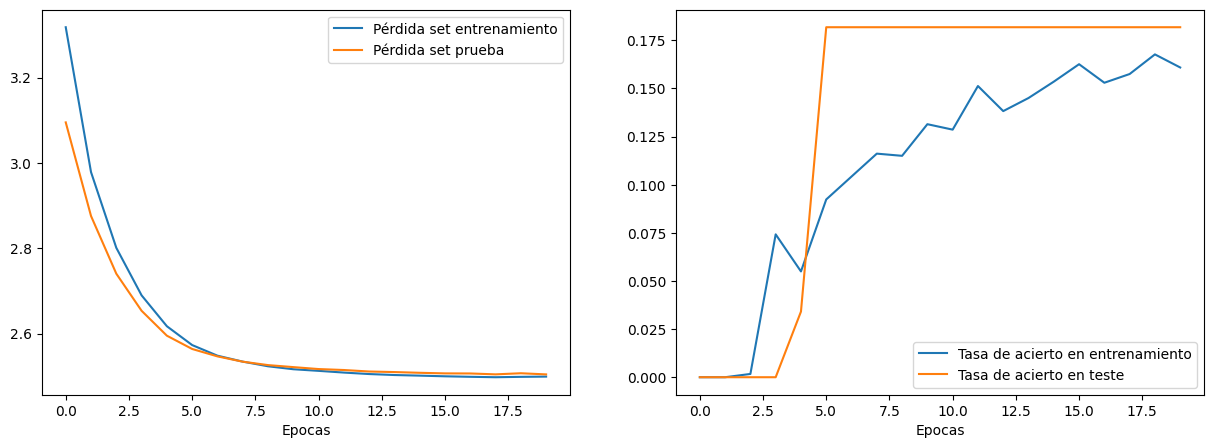

In [29]:
import matplotlib.pyplot as plt
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Tasa de acierto en entrenamiento")
plt.plot(historia.history["val_accuracy"], label="Tasa de acierto en teste")
plt.xlabel('Epocas')
plt.legend()

In [30]:
autoencoder1_2tan = Model(inputs=entrada_t, outputs=decoded_t)
autoencoder1_2tan.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = autoencoder1_2tan.fit(rep_train_1tan, rep_train_1tan,    
                           epochs=25,
                           batch_size=128,
                           validation_data=(rep_test_1tan, rep_test_1tan),    
                           shuffle=True)

Epoch 1/25
14/14 [==============================] - 2s 18ms/step - loss: 0.0762 - accuracy: 0.0011 - val_loss: 0.0580 - val_accuracy: 0.0000e+00
Epoch 2/25
14/14 [==============================] - 0s 8ms/step - loss: 0.0464 - accuracy: 0.0000e+00 - val_loss: 0.0346 - val_accuracy: 0.0000e+00
Epoch 3/25
14/14 [==============================] - 0s 7ms/step - loss: 0.0275 - accuracy: 0.0000e+00 - val_loss: 0.0205 - val_accuracy: 0.0000e+00
Epoch 4/25
14/14 [==============================] - 0s 7ms/step - loss: 0.0166 - accuracy: 5.6657e-04 - val_loss: 0.0128 - val_accuracy: 0.0000e+00
Epoch 5/25
14/14 [==============================] - 0s 7ms/step - loss: 0.0107 - accuracy: 0.0000e+00 - val_loss: 0.0087 - val_accuracy: 0.0000e+00
Epoch 6/25
14/14 [==============================] - 0s 7ms/step - loss: 0.0077 - accuracy: 0.0045 - val_loss: 0.0066 - val_accuracy: 0.0000e+00
Epoch 7/25
14/14 [==============================] - 0s 8ms/step - loss: 0.0061 - accuracy: 0.0011 - val_loss: 0.0055 - 

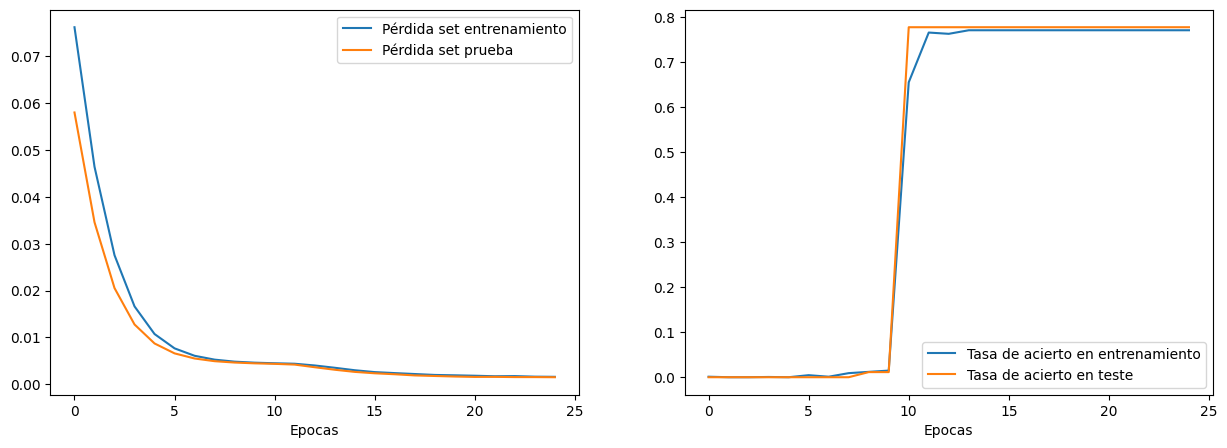

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Tasa de acierto en entrenamiento")
plt.plot(historia.history["val_accuracy"], label="Tasa de acierto en teste")
plt.xlabel('Epocas')
plt.legend()

In [32]:
bottleneck = Model(entrada_s, encoded_s)
rep_test_1s = bottleneck.predict(rep_test_1sig)
rep_train_1s = bottleneck.predict(rep_train_1sig)
print(rep_test_1s.shape)
print(rep_train_1s.shape)

56/56 [==============================] - 0s 1ms/step
(440, 200)
(1765, 200)


In [33]:
bottleneck = Model(entrada_t, encoded_t)
rep_test_1t = bottleneck.predict(rep_test_1tan) #rep_test_1tan
rep_train_1t = bottleneck.predict(rep_train_1tan) #
print(rep_test_1t.shape)
print(rep_train_1t.shape)

56/56 [==============================] - 0s 2ms/step
(440, 200)
(1765, 200)


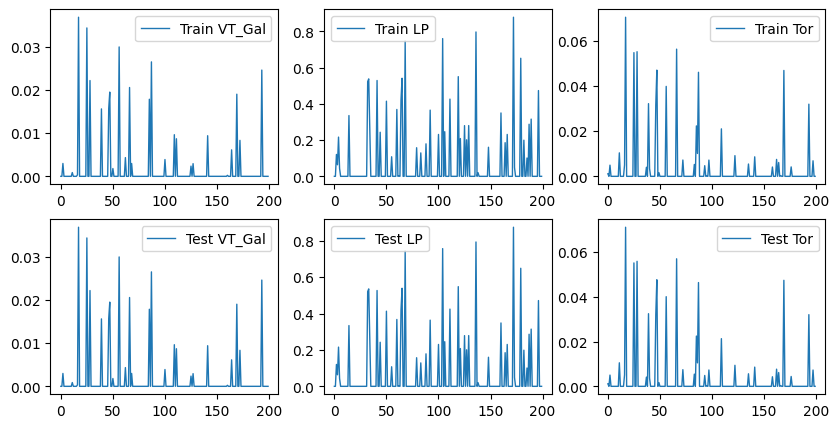

In [34]:
plt.figure(figsize=(10,5))
plt.subplot(2,3,1)
plt.plot(rep_train_1t[1000], linewidth=1)
plt.legend(labels=["Train VT_Gal"])
plt.subplot(2,3,2)
plt.plot(rep_train_1t[1550], linewidth=1)
plt.legend(labels=["Train LP"])
plt.subplot(2,3,3)
plt.plot(rep_train_1t[1750], linewidth=1)
plt.legend(labels=["Train Tor"], loc='upper right')

plt.subplot(2,3,4)
plt.plot(rep_test_1t[300], linewidth=1)
plt.legend(labels=["Test VT_Gal"])
plt.subplot(2,3,5)
plt.plot(rep_test_1t[390], linewidth=1)
plt.legend(labels=["Test LP"])
plt.subplot(2,3,6)
plt.plot(rep_test_1t[435], linewidth=1)
plt.legend(labels=["Test Tor"])

# **Representaciones D A F**

Una vez entrenado el autoencoder extraemos la información aprendida de la capa de menor dimensión, la cual consigue representar mejor la señal.

A continuación se presenta una representación por cada tipo de señal solo para poder identificar las diferntes representaciones obtenidas.

In [35]:
rep_train_1 = np.concatenate([rep_train_1s,rep_train_1t], axis=1) 
rep_test_1 = np.concatenate([rep_test_1s,rep_test_1t], axis=1) 
print(rep_test_1.shape)
print(rep_train_1.shape)

(440, 400)
(1765, 400)


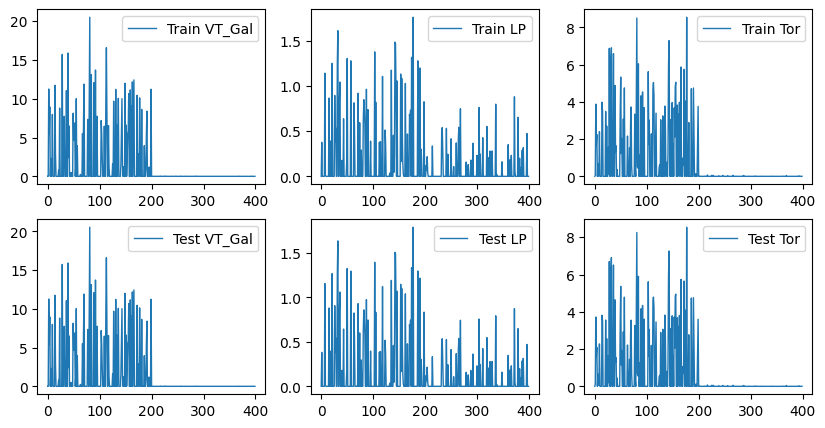

In [36]:
# Observamos cómo el Autoencoder consigue representar 

# Elegimos un dato al azar de los registro de los data sets de validación
# El data set con el menor número de datos de validación es para la señal Tor con 6 ejemplos.

plt.figure(figsize=(10,5))
plt.subplot(2,3,1)
plt.plot(rep_train_1[1000], linewidth=1)
plt.legend(labels=["Train VT_Gal"])
plt.subplot(2,3,2)
plt.plot(rep_train_1[1550], linewidth=1)
plt.legend(labels=["Train LP"])
plt.subplot(2,3,3)
plt.plot(rep_train_1[1750], linewidth=1)
plt.legend(labels=["Train Tor"], loc='upper right')

plt.subplot(2,3,4)
plt.plot(rep_test_1[300], linewidth=1)
plt.legend(labels=["Test VT_Gal"])
plt.subplot(2,3,5)
plt.plot(rep_test_1[390], linewidth=1)
plt.legend(labels=["Test LP"])
plt.subplot(2,3,6)
plt.plot(rep_test_1[435], linewidth=1)
plt.legend(labels=["Test Tor"])

# **Classificação com MLPerceptron**

**Normalización de las representaciones**

Mínimo y máximo originales: 0.0, 20.9
Mínimo y máximo normalizado: 0.0, 1.0
400


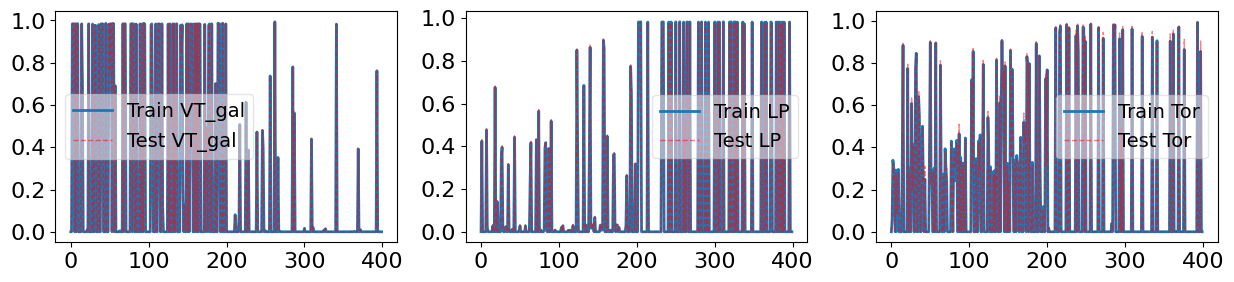

In [37]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

# Señales VT
Rep_train_s1 = min_max_scaler.fit_transform(rep_train_1)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(rep_train_1), np.max(rep_train_1)))      
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}'.format(np.min(Rep_train_s1), np.max(Rep_train_s1))) 
Rep_test_s1 = min_max_scaler.transform(rep_test_1)  


# Graficando
n3 = Rep_train_s1.shape[1]
t3 = np.linspace(0,fs,n3) # creando un vector de tiempo
print(len(t3))

#fig, axs = plt.subplots(2, 2, figsize=(15, 15))

plt.figure(figsize=(15, 3))

plt.subplot(131)
plt.plot(Rep_train_s1[1000], lw=2, label="Train VT_gal")
plt.legend(fontsize='14', fancybox=True, framealpha=0.5)
plt.xticks(fontsize=16), plt.yticks(fontsize=16)
plt.subplot(132)
plt.plot(Rep_train_s1[1550], lw=2, label="Train LP")
plt.legend(fontsize='14', fancybox=True, framealpha=0.5)
plt.xticks(fontsize=16), plt.yticks(fontsize=16)
plt.subplot(133) 
plt.plot(Rep_train_s1[1750], lw=2, label="Train Tor")
plt.legend(fontsize='14', fancybox=True, framealpha=0.5)
plt.xticks(fontsize=16), plt.yticks(fontsize=16)



plt.subplot(131)
plt.plot(Rep_test_s1[300], 'r--', alpha=0.5, lw=1, label="Test VT_gal")
plt.legend(fontsize='14', fancybox=True, framealpha=0.5)
plt.subplot(132)
plt.plot(Rep_test_s1[390], 'r--', alpha=0.5, lw=1, label="Test LP")
plt.legend(fontsize='14', fancybox=True, framealpha=0.5)
plt.subplot(133)
plt.plot(Rep_test_s1[435], 'r--', alpha=0.5, lw=1, label="Test Tor")
plt.legend(fontsize='14', fancybox=True, framealpha=0.5)


plt.savefig('caracter_DAF2.pdf', dpi=400, format='pdf')

**Clasificador MLP**

In [38]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras import Sequential
from keras.regularizers import l2 # cuando hay sobreajuste la regularización ayuda
# a decartar valores altos en la función de costo. Se puede colocar en cualquier capa
from keras.layers import Dropout  #apagar aleatoriamente algunas neuronas, 
# ayudando a eliminar el sobreajuste
from keras.callbacks import EarlyStopping

In [39]:
#np.random.seed(23)

dim_entrada = X_train.shape[1]      
entrada = Input(shape=(dim_entrada,))
print(X_train.shape[1])      

x = Dense(500, activation='relu', kernel_regularizer=l2(0.005))(entrada)
x = Dropout(0.25)(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.5)(x)
saida = Dense(3, activation='softmax')(x)

clasificador = Model(inputs=entrada, outputs=saida)
clasificador.summary()

3000
Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 3000)]            0         
                                                                 
 dense_18 (Dense)            (None, 500)               1500500   
                                                                 
 dropout_12 (Dropout)        (None, 500)               0         
                                                                 
 dense_19 (Dense)            (None, 100)               50100     
                                                                 
 dropout_13 (Dropout)        (None, 100)               0         
                                                                 
 dense_20 (Dense)            (None, 3)                 303       
                                                                 
Total params: 1,550,903
Trainable params: 1,550,903
N

# Implementando Validación Cruzada Estratificada y Clasificación

In [40]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

Definimos la configuracipon de Validacipon Cruzada estratificada y luego el modelo de clasificación:

In [41]:
cv = StratifiedShuffleSplit(n_splits=6, random_state=True)

clasificador = Model(inputs=entrada, outputs=saida)

A continuación se vuelve a concatenar los set de train y test para aplicar la Validación Cruzada Estratificada

In [42]:
X = np.concatenate((Rep_train_s1, Rep_test_s1), axis=0)

y_label = y

Creando un vector y con la información de las etiquetas de la forma one-hot

In [44]:
# Codificando vector de etiquetas de la forma one-hot 
y = (np.eye(3)[y_label.astype(int)]).reshape((2205,3))


print(X.shape, y_label.shape, y.shape)

(2205, 400) (2205,) (2205, 3)


In [45]:
print(y, y_label)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]] [0. 0. 0. ... 2. 2. 2.]


**Aplicando la curva ROC:**

StratifiedShuffleSplit(n_splits=6, random_state=True, test_size=None,
            train_size=None)
TRAIN: [ 948 1851  320 ...  182   16  422] TEST: [ 595 1595 1890  196 1801  317  933 1120  252 1300  170  648 2065  327
 1337  155 1095  586 1655 1356 1531 1790 1360 1034 1757 1614 1526 2057
  316  278  999 1670 1971 1150 1255  871 1624 1111 1498  416  901 1914
  485 1793 1700  243  633  849  210 2175   96 1326 2031   25 1202 1372
  960 1456 1049 1666  630  141  715  564 1088 1511  489  319 1415 1312
  751 1781 1747  152 1050 1425  847  865 1031 2174 1977  580  914 1217
  615 1444 1547 1983 1277  279 1303 1001  144 2202 2050 1620 1698 2115
 1854 1458  431  129 1061 1164  269 1099 1039 2106  695 1892 2178 1633
  508 1871  668 1214 2141 1389 1581 1569 1517  896  889  357 2049 1866
 1096  405 1769  905  468 1067 1321 1945  627  469 2162  235 1345 1110
 1683 1818  728 1362 2198 1934 2107  562 1876  753  398  626 1641 1691
  706  263 1988 1380 1942  749  130 1961 1239  149  313  532  829  928


TRAIN: [ 986 1354  416 ...  833  801  700] TEST: [ 827  443  390  777  581  618 2129  679 2081  887   36  737 1586  999
  209  320 1607 2021 1037 2164 1656  731  657 1367 1937 1411  593  211
 1511 1969  229  321 1799 1214 1097  901   32  379 1559 1089 1340  854
 2071  491  105 1080   78  757  994 1174  804 1399  471  403 1106 1412
 1127  815   61 2122 1482  422 1553  246 1441 1293 1669 1164 1561 1547
 1133 1146 1674  191 1965 1774  587 2204  851 1886  334 1905 1220 1957
  659  944 2198  599 1660  622 1666  823 1961 1500 1298 2051 1374 1384
 1862  270 2045  361 1939  620   84  120  227  284   76  256  266 2049
  509 1120 1470 1514  902 1591 1190 1741 2196  703 1419 1728  465  118
 1738 1042 1126 1124 1160  197 1845 1353 1055 1020  393 1158 1030   53
 1616  577   13  898 1893  488 1414 1335  759  194  960 1655 1789 2058
  133 1766 2097 1269 1838 2160  661  358 1630 1633 1516 1274 1782  974
 2147  396  226 1773  187  506 1286 1229 1915 2042 1054 1121  223  635
 1094  893 1451  972 1143 10

TRAIN: [ 887   29  217 ... 1479 1067 1078] TEST: [1660  833  444 1824 2090  235 1768  379 1457  791 1462 2022 1725 1869
  605  737 1542 1155 1451  276 1454  117  163 1952  671 2069 1132  623
  741  311 1958  103 1140 1665 1348  211 2101 1574 1007  934 1277 1476
  951 1745 2182  386 2019 1856 1406 1954  284   24 1294 2098  885  267
 2074 2166 2102 1428  385 1077  584  151 1151 1632  162 1685  907 1343
  251 1163 1747 1610 1891 1503 1486 1552 1021 1380 1161 1039  202 2146
  404  903 1321  842  865 1946 1778   75  879 1367  716 2105   85 1063
  760 1248 1596  502 2093 2147 1046 1984 1944 2071  277 1460 2001  732
 1707  540  258  167 1986  208 1692  327  613  668 1754  869 2009  608
 1246  285  770  293 1347  571  572 1342 2198  579 2135 1238 1772  930
  965  614 1214  335 2059 1886 1296 1429  734  744 1689   91 1953  701
 1037 1524 2128 1583 1200  535 1196 2018  935 2000  632 1225  861  197
 1299 1673 1739   57  322  416 1794 1516 1232  157 2037 1259 1626  989
  221 2002 1567  558  244 15

TRAIN: [1124  160 1375 ... 1215  439 1773] TEST: [1966 1577  389  436  157   33  615 1727 1613  433 2012   54  210 1706
  207 1335  605  602 1513  484  707  907 1533  351  303   17   72 1248
 1747 1309  486 1809 1287 1819 1601  826  164  608 1798  943 1540 2090
 2051 1104 1257 1916 1260  723 1906  267 2042 1772 1938 1996  755 1606
  423 1202  297 1300  362 1544 2038 1846 2186 1942 1537 1462 1475 2046
 1163 1741 1779 1184  283 1686 1423 1083  785 2047  600 1882 1140 1398
  367   65  774  410  614 1529 2054 1129 1515  282 1418  909  790 1328
 1778  104 1285  866 1087 1427  523 1189 1441  105  253  271 1588  641
  867  402  719  101  280  577  463 1700 1055 2196 1978  904   81 2086
 1173  618 1348  284 1845  685 2127 1003 1302 1742 1349 2150  845  676
 1637  933  876 1807  881 1818 1323  575   31 2050  140 1608 1369  159
  921 1031  919 1556  957  139  908  555  751  426  988 1388 2067  992
 1864  112 2020 2063  801 2139 1598  611  542 1997 1965  574 1306  802
 1082  975 2045 1084 1390 17

TRAIN: [ 780 1363 1618 ...  584 1244  994] TEST: [  11 1129  252 1280  443  844  781 1738  501   19  700 1626 1388 1620
 1419  591 1568 1507 1303 1813  590 1723 1824   28 1598  462  785 1642
 1416 2199 1942  596 1339 1384  167   92 1535  111 1963  858 1939 1417
  823  877  604 1163 1227 1015 1563  953  961 1969  835  185  630 1062
  509  555 1498  779  747  447 1494  947 2192  291 1063 1257 1886  373
 1149 1019 1753  278 1766  898  986 1544  104  168  258 2173 1953  217
 1662 1424 1989 1113  379  973 1175 1420  601 1817    6  158  740  608
  481  704 2153 1525  351  297  114  945  491 2117 1883  786 1271  811
 1516  906 1312 1202  992  641  929 2002  224 1861  393 1480  996 1373
 1588  797 1181 1749 1055 1936 1043 2089  648 2152  313  387 1495 2121
  997  803 2175  819 2165   37 1376  432 2177  311  878  515  895 1281
  778  181 1481  674 1390 2128  214  154 1109 1025  751 1432 1367  290
 1391 1882  892  441 1135 1137  820 1957  952  642 1441  340  897 1845
 1445 1616  298  233  415  1

TRAIN: [ 324 1458 1719 ... 1499  861 1625] TEST: [ 510  654 1724 1985  296  763  135  840  845  476  959  127 1688  997
 1940 1228  209  968 2184 1472 1906  464  332 1598  177 1013  725 1536
 1452    2 1490  374 1287 1264 2146  417  661 2102 1527 1161 1132  854
  637  756 1495 2204  401  870 1659   40   23 2149   12  509  484  952
 1882 1826 1489  262   85 1202  925 1197  786 2176 1084   45  439 1322
  571 1195 1292  594 1588 1369  468 1359  947 1014  217  541  122 1994
 2126 1415  585 1296 2136 2002 1358  100  233 1751  283 1225 1016  490
 1390  420  113  720 1944 1253   87  555  147  319  353 1870   38 1721
 2200 1206 1999 1975 1073 1475  128  717   67 1232  250   97 2118 2015
 1876 2099  361 1236 1643  779 1182  173 1801 1416  589 1221  731 1938
 2198 1211 1294 1021  749  775  102 1560  740  876 2142 1473 1631 2129
 1252 1501 2028  739  886 1951  922  690  386 2067 1241 1156   79 1609
 1570 1397 1873 1372 1051  256  965 1592  337  564  814 1593 1095 1184
  479 1800  933 1837 1382  8

train -  [1562  362   60]   |   test -  [174  40   7]
train -  [1562  362   60]   |   test -  [174  40   7]
train -  [1562  362   60]   |   test -  [174  40   7]
train -  [1562  362   60]   |   test -  [174  40   7]
train -  [1562  362   60]   |   test -  [174  40   7]
train -  [1562  362   60]   |   test -  [174  40   7]


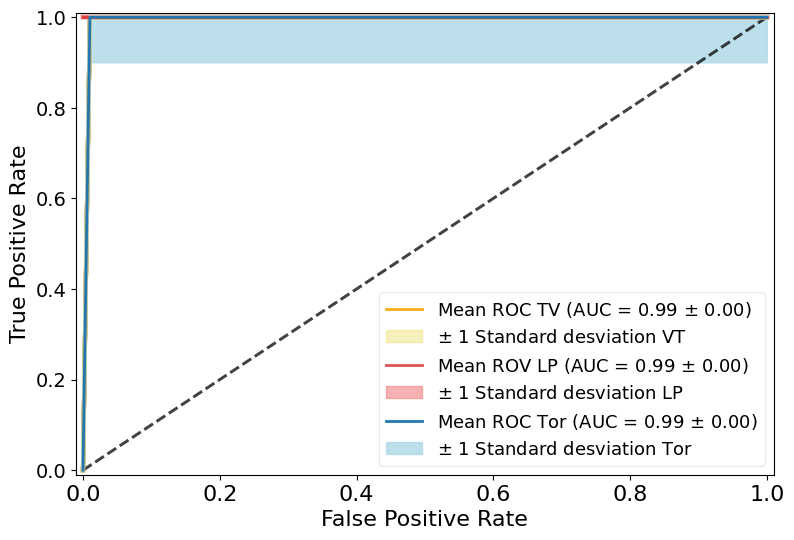

<Figure size 600x600 with 0 Axes>

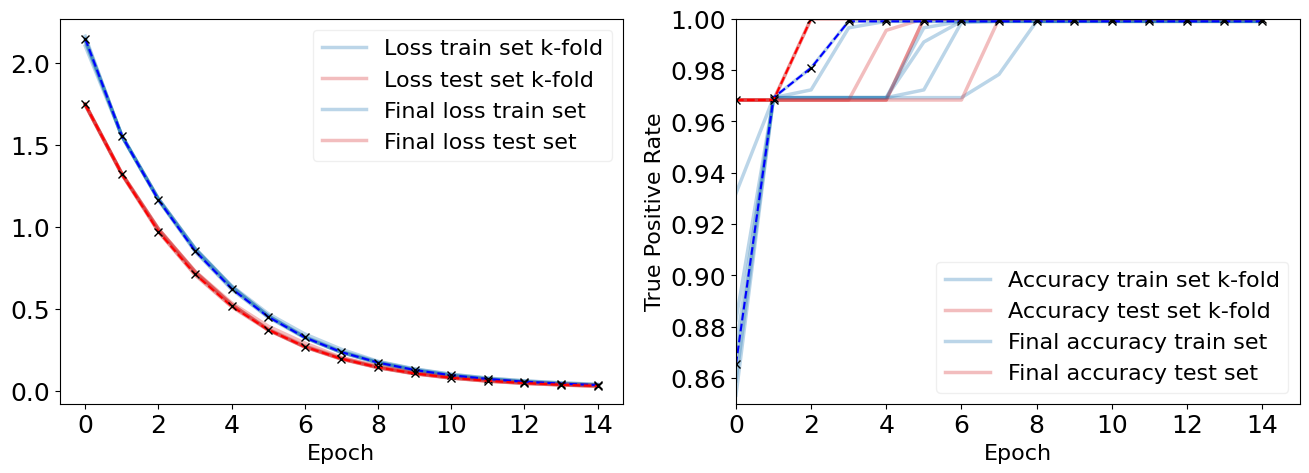

In [46]:
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
from itertools import cycle



print(cv)
StratifiedShuffleSplit(n_splits=6, random_state=True)

fig, ax = plt.subplots(1, figsize=(9,6))
tprs_mean_0 = []
tprs_mean_1 = []
tprs_mean_2 = []
aucs_0 = []
aucs_1 = []
aucs_2 = []
fold = 1

for train_index, test_index in cv.split(X, y_label):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  dim_entrada = X.shape[1]      
  entrada = Input(shape=(dim_entrada,))
  x = Dense(500, activation='relu', kernel_regularizer=l2(0.005))(entrada)
  x = Dropout(0.25)(x)
  x = Dense(100, activation='relu')(x)
  x = Dropout(0.25)(x)
  saida = Dense(3, activation='softmax')(x)

  clasificador = Model(inputs=entrada, outputs=saida)
  clasificador.compile(optimizer='adam', loss='mae', metrics=['categorical_accuracy'])
  historia = clasificador.fit(X_train, y_train,    
                           epochs=15,
                           batch_size=250,
                           validation_data=(X_test, y_test),    
                           shuffle=True)

  print("ENTRENAMIENTO EN EL FOLD %0.2F" %(fold))  
  y_pred = clasificador.predict(X_test)

  tprs = []
  Corte = []

  base_fpr = np.linspace(0,1,101)
  mean_fpr = np.linspace(0,1,100)

  
  # Curva ROC para la clase VT

  for i in range(len(y_pred)):
    fpr, tpr, th = roc_curve(y_test[:, 0], y_pred[:, 0])
    auc1 = roc_auc_score(y_test[:, 0], y_pred[:, 0]) # Es auc1, o deberia ser auc0???????? no importa porque luego forma un vector para cada tipo de sismo
  
  interp_tpr = np.interp(mean_fpr, fpr, tpr)
  interp_tpr[0] = 0.0
  tprs.append(interp_tpr)
  aucs_0.append(auc1)

  Corte.append(th[np.argmax(tpr - fpr)])
  ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
          alpha=0.2)
  
  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  ax.plot(
      mean_fpr,
      mean_tpr,
      color = 'orange',
      lw = 3,
      alpha = 0.9
  )
  tprs_mean_0.append(mean_tpr)

  plt.xlim([-0.01, 1.01])
  plt.ylim([-0.01, 1.01])
  plt.ylabel('True Positive Rate', fontsize=16)
  plt.xlabel('False Positive Rate', fontsize=16)

  
  # Curva ROC para la clase LP

  tprs = []
  for i in range(len(y_pred)):
    fpr, tpr, th = roc_curve(y_test[:, 1], y_pred[:, 1])
    auc1 = roc_auc_score(y_test[:, 1], y_pred[:, 1])
  
  interp_tpr = np.interp(mean_fpr, fpr, tpr)
  interp_tpr[-1] = 0.0
  tprs.append(interp_tpr)
  aucs_1.append(auc1)

  Corte.append(th[np.argmax(tpr-fpr)])

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  ax.plot(
      mean_fpr,
      mean_tpr,
      color = "lightcoral",
      lw = 3,
      alpha = 0.99
  )
  tprs_mean_1.append(mean_tpr)

  
  # Curva ROC para la clase Tor

  tprs = []
  for i in range(len(y_pred)):
    fpr, tpr, th = roc_curve(y_test[:, 2], y_pred[:, 2])
    auc1 = roc_auc_score(y_test[:, 2], y_pred[:,2])
  
  interp_tpr = np.interp(mean_fpr, fpr, tpr)
  interp_tpr[0] = 0.0
  tprs.append(interp_tpr)
  aucs_2.append(auc1)

  Corte.append(th[np.argmax(tpr-fpr)])

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  ax.plot(
      mean_fpr,
      mean_tpr,
      color = "lightblue",
      lw = 3,
      alpha = 0.99
  )

  tprs_mean_2.append(mean_tpr)
  ax.legend(loc="lower right", fontsize = 8)
  plt.xticks(fontsize=16), plt.yticks(fontsize=14)


  import matplotlib.pyplot as plt
  plt.figure(5, figsize=(16,5))
  plt.subplot(1,2,1)
  plt.plot(historia.history["loss"], color = 'tab:blue', alpha = 0.3, lw = 2.5) 
  plt.plot(historia.history["val_loss"], color = 'tab:red', alpha = 0.3, lw = 2.5) 
  plt.subplot(1,2,2)
  plt.plot(historia.history["categorical_accuracy"], color = 'tab:blue', alpha = 0.3, lw = 2.5) 
  plt.plot(historia.history["val_categorical_accuracy"], color = 'tab:red', alpha = 0.3, lw = 2.5) 
  
  fold = fold + 1


for train, test in cv.split(X, y_label):
  print('train -  {}   |   test -  {}'.format(
      np.bincount(y_label[train].astype('int64')), np.bincount(y_label[test].astype('int64'))))

plt.figure(3, figsize = (6,6))
tpr_0_final = np.mean(tprs_mean_0, axis=0)
std_tpr_0 = np.std(tpr_0_final, axis=0)
tprs_upper_0 = np.minimum(tpr_0_final + std_tpr_0, 1)
tprs_lower_0 = np.maximum(tpr_0_final + std_tpr_0, 0)

tpr_0_final[-1] = 1.0
mean_auc_0 = auc(mean_fpr, tpr_0_final)
std_auc_0 = np.std(aucs_0)
ax.plot(
    mean_fpr,
    tpr_0_final,
    color = "orange",
    label = "Mean ROC TV (AUC = %0.2f $\pm$ %0.2f)" %(mean_auc_0, std_auc_0),
    lw = 2,
    alpha = 0.9
)
ax.fill_between(
    mean_fpr,
    tprs_lower_0,
    tprs_upper_0,
    color = "khaki",
    alpha = 0.6,
    label = "$\pm$ 1 Standard desviation VT",
)

tpr_1_final = np.mean(tprs_mean_1, axis=0)
std_tpr_1 = np.std(tpr_1_final, axis =0)
tprs_upper_1 = np.minimum(tpr_1_final + std_tpr_1, 1)
tprs_lower_1 = np.maximum(tpr_1_final - std_tpr_1, 0)

tpr_1_final[-1] = 1.0
mean_auc_1 = auc(mean_fpr, tpr_0_final)
std_auc_1 = np.std(aucs_1)
ax.plot(
    mean_fpr,
    tpr_1_final,
    color = "tab:red",
    label = "Mean ROV LP (AUC = %0.2f $\pm$ %0.2f)" %(mean_auc_1, std_auc_1),
    lw = 2,
    alpha = 0.8
)
ax.fill_between(
    mean_fpr,
    tprs_lower_1,
    tprs_upper_1,
    color = "lightcoral",
    alpha = 0.6,
    label = "$\pm$ 1 Standard desviation LP"
)

tpr_2_final = np.mean(tprs_mean_2, axis=0)
std_tpr_2 = np.std(tpr_2_final, axis=0)
tprs_upper_2 = np.minimum(tpr_2_final + std_tpr_2, 1)
tprs_lower_2 = np.maximum(tpr_2_final -std_tpr_2, 0)

tpr_2_final[-1] = 1.0
mean_auc_2 = auc(mean_fpr, tpr_2_final)
std_auc_2 = np.std(aucs_2)
ax.plot(
    mean_fpr,
    tpr_2_final,
    color = "tab:blue",
    label = "Mean ROC Tor (AUC = %0.2f $\pm$ %0.2f)" %(mean_auc_2, std_auc_2),
    lw = 2,
    alpha = 0.99
)
ax.fill_between(
    mean_fpr,
    tprs_lower_2,
    tprs_upper_2,
    color = "lightblue",
    alpha = 0.8,
    label = "$\pm$ 1 Standard desviation Tor"
)

ax.legend(loc="lower right", fontsize = 13, fancybox=True, framealpha=0.4)
ax.figure.savefig('ROC_DAF.pdf', dpi=400, format='pdf')

plt.figure(5, figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], 'xb--',mec='k', lw=1.5) 
plt.plot(historia.history["val_loss"], 'xr--',mec='k', lw=1.5) 
plt.xlabel('Epoch', fontsize=16)
plt.xticks(fontsize=18), plt.yticks(fontsize=18)
plt.legend(labels=["Loss train set k-fold", 
                   "Loss test set k-fold",
                   "Final loss train set", 
                   "Final loss test set"], 
           fontsize='16', fancybox=True, framealpha=0.3)
plt.subplot(1,2,2)
plt.plot(historia.history["categorical_accuracy"], 'xb--',mec='k', lw=1.5) 
plt.plot(historia.history["val_categorical_accuracy"], 'xr--',mec='k', lw=1.5) 
plt.xlim(0, 15)
plt.ylim(0.85, 1.0)
plt.xlabel('Epoch', fontsize=16)
plt.legend(labels=["Accuracy train set k-fold", 
                   "Accuracy test set k-fold",
                   "Final accuracy train set", 
                   "Final accuracy test set"], 
           fontsize='16', fancybox=True, framealpha=0.3, loc='lower right') 
plt.xticks(fontsize=18), plt.yticks(fontsize=18)

plt.savefig('CrossVall_DAF.pdf', dpi=400, format='pdf')

**Matriz de confusión**

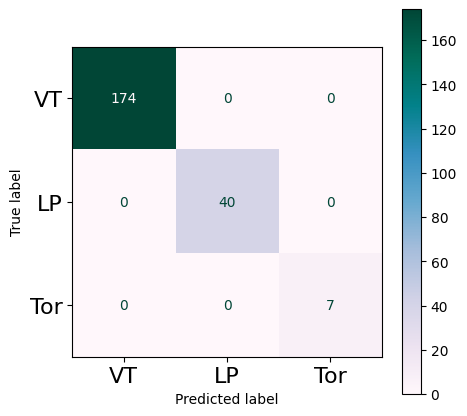

[[[ 47   0]
  [  0 174]]

 [[181   0]
  [  0  40]]

 [[214   0]
  [  0   7]]]
matriz VT  [[ 47   0]
 [  0 174]]
matriz LP  [[181   0]
 [  0  40]]
matriz Tor  [[214   0]
 [  0   7]]


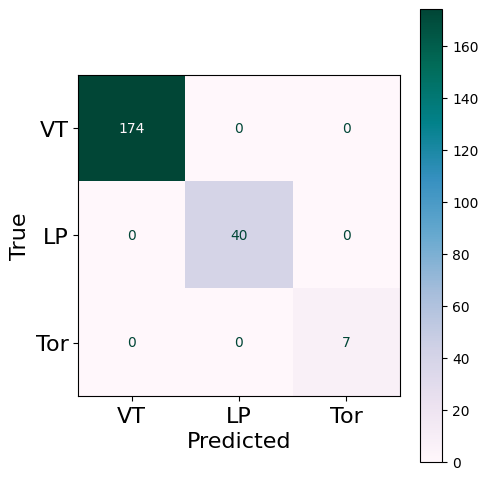

In [47]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix

y_pred_ = np.rint(y_pred)
y_salida = []
for i in range(len(y_pred)):
  if y_pred_[i,0] > 0:
    y_salida.append('VT')
  if y_pred_[i,1] > 0:
    y_salida.append('LP')
  if y_pred_[i,2] > 0:
    y_salida.append('Tor') 


y_true = []
for i in range(len(y_test)):
  if y_test[i,0] > 0:
    y_true.append('VT')
  if y_test[i,1] > 0:
    y_true.append('LP')
  if y_test[i,2] > 0:
    y_true.append('Tor')

c = confusion_matrix ( y_true , y_salida , labels = ["VT", "LP", "Tor"] , sample_weight = None)
disp = ConfusionMatrixDisplay(confusion_matrix=c, display_labels=["VT", "LP", "Tor"])
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax, cmap = 'PuBuGn', colorbar = True)
plt.xticks(fontsize=16), plt.yticks(fontsize=16)
plt.show()

fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax, cmap = 'PuBuGn', colorbar = True)
ax.tick_params(axis='both', labelsize=16)
ax.set_xlabel('Predicted', fontsize=16)
ax.set_ylabel('True', fontsize=16)
plt.tight_layout()
plt.savefig('confusion_matrix.pdf', dpi=400, format='pdf')


plt.rcParams.update({'font.size': 16})
# plt.rc('font', **font)

cm = multilabel_confusion_matrix(y_true, y_salida, labels=["VT", "LP", "Tor"])
print(cm)
cmVT = cm[0]
cmLP = cm[1]
cmTor = cm[2]
print('matriz VT ', cmVT)
print('matriz LP ', cmLP)
print('matriz Tor ', cmTor)